In [17]:
# Step 1: Load & Explore the Dataset
import pandas as pd

# Load dataset
file_path = "healthcare_dataset.csv"  # Update this path if needed
df = pd.read_csv(file_path)

# Display basic dataset info
print("Dataset Information:")
print(df.info())

# Display first few rows
print("\nFirst 5 Rows of Dataset:")
print(df.head())

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of Duplicate Rows:", df.duplicated().sum())

# Separate numerical and categorical features
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()

print("\nNumerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

# Check class distribution of target variable (assuming 'Medical Condition' is the target)
if "Medical Condition" in df.columns:
    print("\nClass Distribution of Medical Condition:")
    print(df["Medical Condition"].value_counts(normalize=True) * 100)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(1

In [18]:
# Step 2: Data Preprocessing & Cleaning
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset
file_path = "healthcare_dataset.csv"  # Update if needed
df = pd.read_csv(file_path)

### 1. Remove Personal & Irrelevant Information
columns_to_drop = ["Name", "Doctor", "Hospital", "Insurance Provider", "Room Number"]
df_cleaned = df.drop(columns=columns_to_drop, errors="ignore")  # Ignore error if column not found

### 2. Handle Missing Values (If Any)
df_cleaned.fillna(df_cleaned.median(numeric_only=True), inplace=True)  # Fill numerical NaNs with median
df_cleaned.fillna("Unknown", inplace=True)  # Fill categorical NaNs with 'Unknown'

### 3. Convert Dates to Meaningful Features
df_cleaned["Date of Admission"] = pd.to_datetime(df_cleaned["Date of Admission"], errors="coerce")
df_cleaned["Discharge Date"] = pd.to_datetime(df_cleaned["Discharge Date"], errors="coerce")

# Create a new feature: Hospital Stay Duration (in days)
df_cleaned["Hospital Stay (Days)"] = (df_cleaned["Discharge Date"] - df_cleaned["Date of Admission"]).dt.days

# Drop original date columns after extracting information
df_cleaned.drop(columns=["Date of Admission", "Discharge Date"], inplace=True)

### 4. Encode Categorical Variables
# Binary Encoding for Gender
df_cleaned["Gender"] = df_cleaned["Gender"].map({"Male": 0, "Female": 1})

# One-Hot Encoding for categorical variables
df_encoded = pd.get_dummies(df_cleaned, columns=["Blood Type", "Admission Type", "Medication", "Test Results"], drop_first=True)

# Label Encoding for the target variable (Medical Condition)
if "Medical Condition" in df_encoded.columns:
    label_encoder = LabelEncoder()
    df_encoded["Medical Condition"] = label_encoder.fit_transform(df_encoded["Medical Condition"])

### 5. Normalize Numerical Features
scaler = StandardScaler()
numeric_features = ["Age", "Billing Amount", "Hospital Stay (Days)"]
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

### 6. Final Check
print("Final Processed Data Sample:")
print(df_encoded.head())

print("\nMissing Values After Processing:")
print(df_encoded.isnull().sum())

Final Processed Data Sample:
        Age  Gender  Medical Condition  Billing Amount  Hospital Stay (Days)  \
0  1.508465       1                  3        0.851249             -0.181360   
1 -0.839912       0                  1        1.548866             -0.181360   
2  0.487431       0                  5        0.807452              1.676598   
3 -0.125189       0                  1       -0.157358             -1.690950   
4 -0.023086       0                  0       -0.528235              0.979864   

   Blood Type_A-  Blood Type_AB+  Blood Type_AB-  Blood Type_B+  \
0          False           False           False          False   
1          False           False           False          False   
2          False           False           False          False   
3          False           False           False          False   
4          False           False           False          False   

   Blood Type_B-  Blood Type_O+  Blood Type_O-  Admission Type_Emergency  \
0          

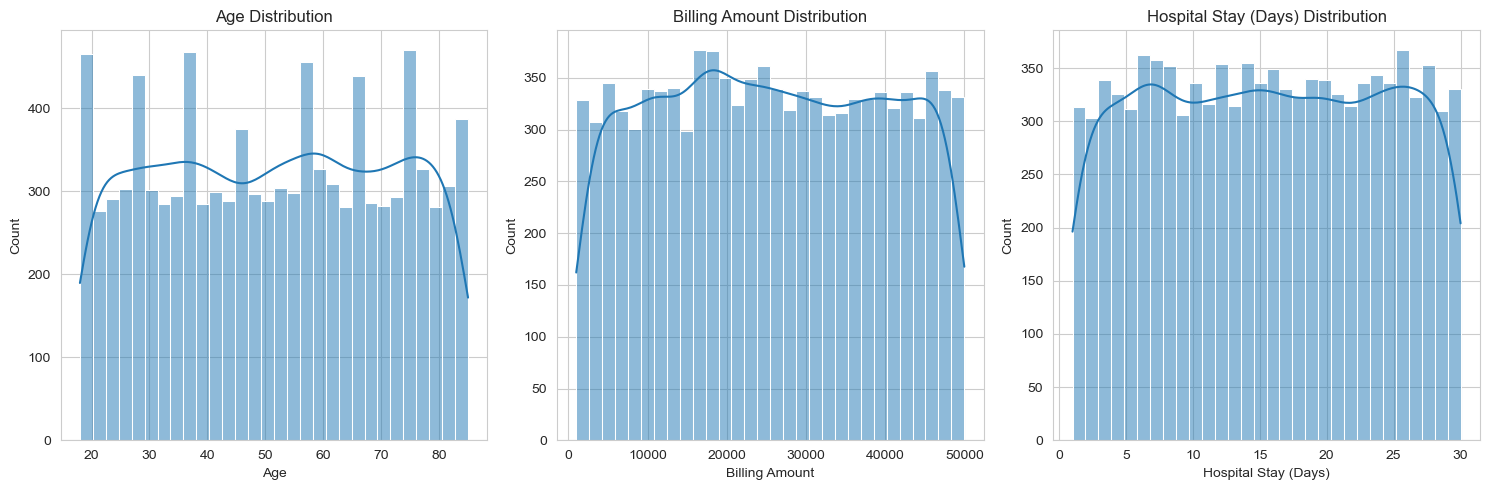

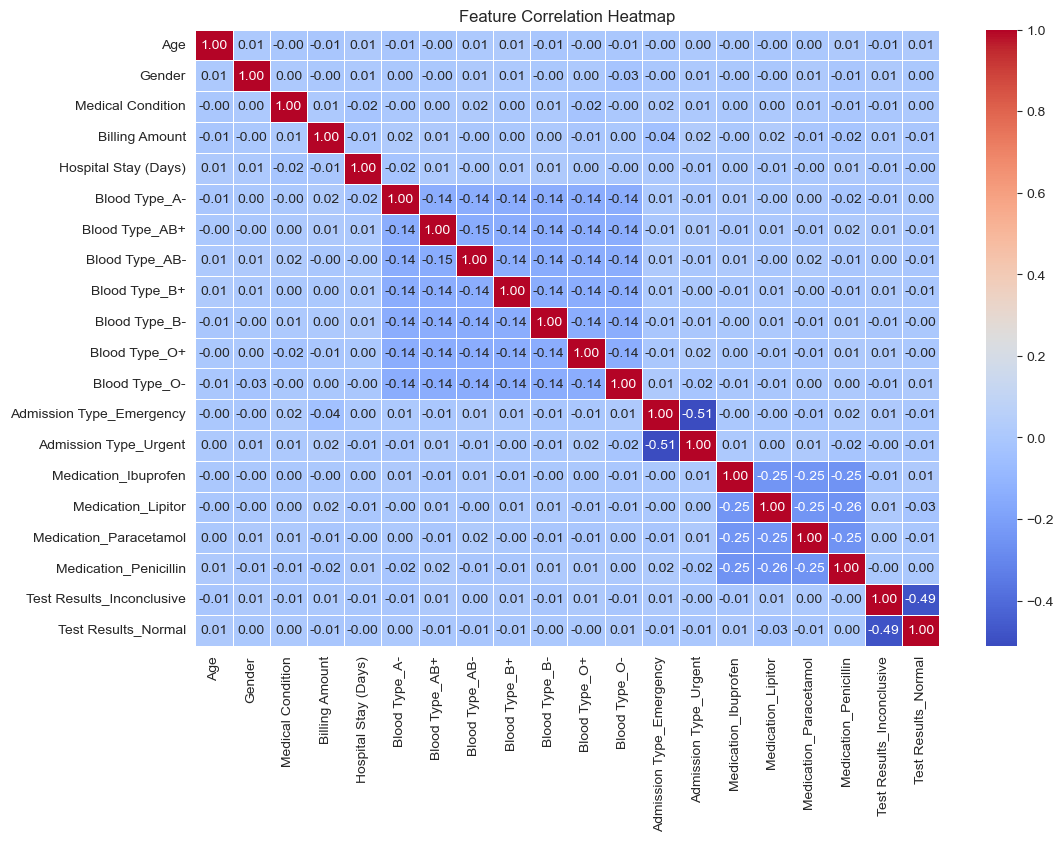

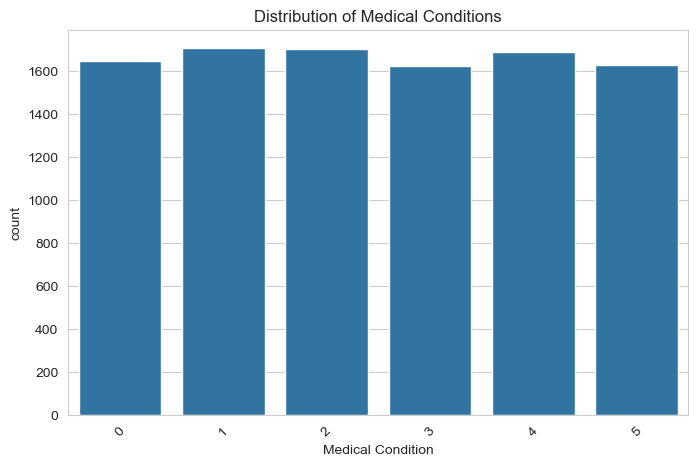

In [20]:
# Step 3: Exploratory Data Analysis (EDA)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load preprocessed dataset
file_path = "healthcare_dataset.csv"  # Update if needed
df = pd.read_csv(file_path)

# Remove personal data and process the dataset (Repeat preprocessing steps)
columns_to_drop = ["Name", "Doctor", "Hospital", "Insurance Provider", "Room Number"]
df_cleaned = df.drop(columns=columns_to_drop, errors="ignore")

df_cleaned["Date of Admission"] = pd.to_datetime(df_cleaned["Date of Admission"], errors="coerce")
df_cleaned["Discharge Date"] = pd.to_datetime(df_cleaned["Discharge Date"], errors="coerce")
df_cleaned["Hospital Stay (Days)"] = (df_cleaned["Discharge Date"] - df_cleaned["Date of Admission"]).dt.days
df_cleaned.drop(columns=["Date of Admission", "Discharge Date"], inplace=True)

df_cleaned["Gender"] = df_cleaned["Gender"].map({"Male": 0, "Female": 1})
df_encoded = pd.get_dummies(df_cleaned, columns=["Blood Type", "Admission Type", "Medication", "Test Results"], drop_first=True)

# Label Encode the target variable
if "Medical Condition" in df_encoded.columns:
    label_encoder = LabelEncoder()
    df_encoded["Medical Condition"] = label_encoder.fit_transform(df_encoded["Medical Condition"])

# Visualize distributions of key numerical features
numeric_features = ["Age", "Billing Amount", "Hospital Stay (Days)"]

plt.figure(figsize=(15, 5))
for i, feature in enumerate(numeric_features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df_encoded[feature], bins=30, kde=True)
    plt.title(f"{feature} Distribution")
plt.tight_layout()
plt.show()

# Correlation heatmap (Fixed: Now works properly)
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Class distribution of target variable (Medical Condition)
if "Medical Condition" in df_encoded.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df_encoded["Medical Condition"])
    plt.xticks(rotation=45)
    plt.title("Distribution of Medical Conditions")
    plt.show()

Class distribution before SMOTE: Counter({1: 1708, 2: 1703, 4: 1688, 0: 1650, 5: 1628, 3: 1623})
Class distribution after SMOTE: Counter({3: 1708, 1: 1708, 5: 1708, 0: 1708, 4: 1708, 2: 1708})


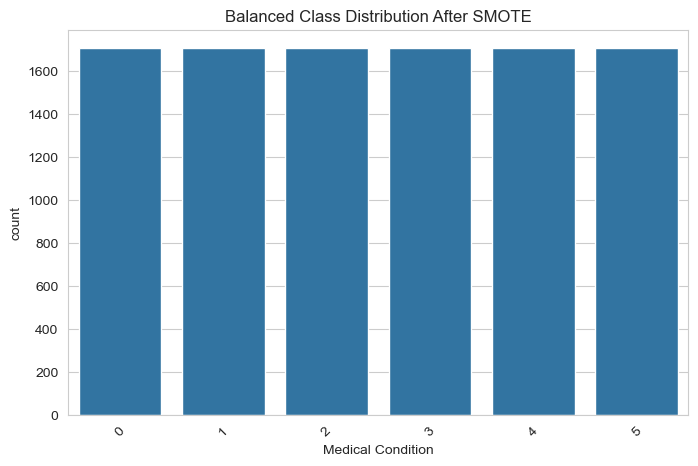

Final Train Shape: (8198, 19) Final Test Shape: (2050, 19)


In [21]:
# Step 4: Handle Class Imbalance (if present)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split

# Load preprocessed dataset
file_path = "healthcare_dataset.csv"  # Update if needed
df = pd.read_csv(file_path)

# Remove personal data and process the dataset
columns_to_drop = ["Name", "Doctor", "Hospital", "Insurance Provider", "Room Number"]
df_cleaned = df.drop(columns=columns_to_drop, errors="ignore")

df_cleaned["Date of Admission"] = pd.to_datetime(df_cleaned["Date of Admission"], errors="coerce")
df_cleaned["Discharge Date"] = pd.to_datetime(df_cleaned["Discharge Date"], errors="coerce")
df_cleaned["Hospital Stay (Days)"] = (df_cleaned["Discharge Date"] - df_cleaned["Date of Admission"]).dt.days
df_cleaned.drop(columns=["Date of Admission", "Discharge Date"], inplace=True)

df_cleaned["Gender"] = df_cleaned["Gender"].map({"Male": 0, "Female": 1})
df_encoded = pd.get_dummies(df_cleaned, columns=["Blood Type", "Admission Type", "Medication", "Test Results"], drop_first=True)

# Label Encode the target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_encoded["Medical Condition"] = label_encoder.fit_transform(df_encoded["Medical Condition"])

# Split dataset into features and target variable
X = df_encoded.drop(columns=["Medical Condition"])
y = df_encoded["Medical Condition"]

# Check class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y))

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))

# Visualize the class distribution after SMOTE
plt.figure(figsize=(8, 5))
sns.countplot(x=y_resampled)
plt.xticks(rotation=45)
plt.title("Balanced Class Distribution After SMOTE")
plt.show()

# Final Train-Test Split (After SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

print("Final Train Shape:", X_train.shape, "Final Test Shape:", X_test.shape)


Top Features Based on ANOVA Test:
 Hospital Stay (Days)    1.043243
Billing Amount          0.924809
Age                     0.601560
dtype: float64

Top Features Based on Mutual Information:
 Admission Type_Emergency     0.011402
Billing Amount               0.005794
Test Results_Normal          0.004860
Medication_Paracetamol       0.004705
Blood Type_AB-               0.004531
Test Results_Inconclusive    0.002663
Blood Type_AB+               0.002064
Blood Type_B-                0.001360
Age                          0.001294
Medication_Ibuprofen         0.000729
dtype: float64

Final Selected Features:
 {'Medication_Ibuprofen', 'Billing Amount', 'Test Results_Normal', 'Blood Type_B-', 'Hospital Stay (Days)', 'Test Results_Inconclusive', 'Blood Type_AB-', 'Medication_Paracetamol', 'Blood Type_AB+', 'Age', 'Admission Type_Emergency'}


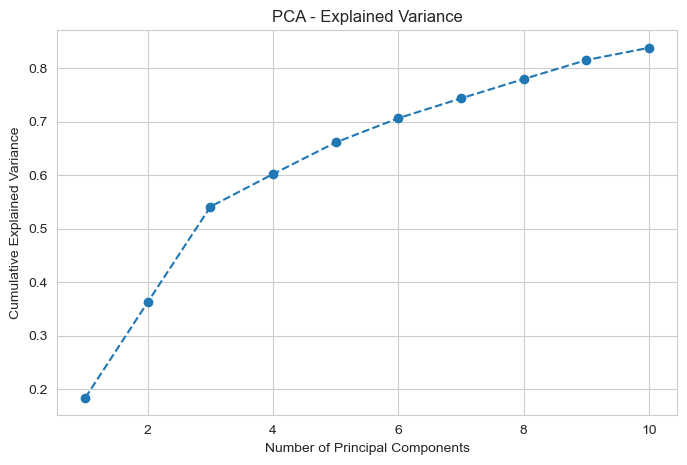

Final Shape of Selected Features Data: (10000, 11)


In [23]:
# Step 5: Feature Engineering & Selection (Fixed Chi-Square Issue)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load preprocessed dataset
file_path = "healthcare_dataset.csv"  # Update if needed
df = pd.read_csv(file_path)

# Remove personal data and process the dataset
columns_to_drop = ["Name", "Doctor", "Hospital", "Insurance Provider", "Room Number"]
df_cleaned = df.drop(columns=columns_to_drop, errors="ignore")

df_cleaned["Date of Admission"] = pd.to_datetime(df_cleaned["Date of Admission"], errors="coerce")
df_cleaned["Discharge Date"] = pd.to_datetime(df_cleaned["Discharge Date"], errors="coerce")
df_cleaned["Hospital Stay (Days)"] = (df_cleaned["Discharge Date"] - df_cleaned["Date of Admission"]).dt.days
df_cleaned.drop(columns=["Date of Admission", "Discharge Date"], inplace=True)

df_cleaned["Gender"] = df_cleaned["Gender"].map({"Male": 0, "Female": 1})
df_encoded = pd.get_dummies(df_cleaned, columns=["Blood Type", "Admission Type", "Medication", "Test Results"], drop_first=True)

# Label Encode the target variable
label_encoder = LabelEncoder()
df_encoded["Medical Condition"] = label_encoder.fit_transform(df_encoded["Medical Condition"])

# Split dataset into features and target variable
X = df_encoded.drop(columns=["Medical Condition"])
y = df_encoded["Medical Condition"]

# Normalize only numerical features
scaler = StandardScaler()
numeric_features = ["Age", "Billing Amount", "Hospital Stay (Days)"]
X[numeric_features] = scaler.fit_transform(X[numeric_features])

### Feature Selection Using Statistical Tests

# 1. Chi-Square Test (Only for categorical features)
categorical_features = [col for col in X.columns if X[col].dtype == "uint8"]  # One-hot encoded columns
if categorical_features:
    chi2_selector = SelectKBest(score_func=chi2, k=min(10, len(categorical_features)))
    X_chi2_selected = chi2_selector.fit_transform(X[categorical_features], y)
    chi2_scores = pd.Series(chi2_selector.scores_, index=categorical_features)
    chi2_top_features = chi2_scores.nlargest(10)
    print("\nTop Features Based on Chi-Square Test:\n", chi2_top_features)

# 2. ANOVA (For numerical features)
anova_selector = SelectKBest(score_func=f_classif, k=min(10, len(numeric_features)))
X_anova_selected = anova_selector.fit_transform(X[numeric_features], y)
anova_scores = pd.Series(anova_selector.scores_, index=numeric_features)
anova_top_features = anova_scores.nlargest(10)
print("\nTop Features Based on ANOVA Test:\n", anova_top_features)

# 3. Mutual Information (For both numerical & categorical features)
mi_selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_mi_selected = mi_selector.fit_transform(X, y)
mi_scores = pd.Series(mi_selector.scores_, index=X.columns)
mi_top_features = mi_scores.nlargest(10)
print("\nTop Features Based on Mutual Information:\n", mi_top_features)

# Combine Top Features from All Methods
selected_features = set(anova_top_features.index) | set(mi_top_features.index)
if categorical_features:
    selected_features |= set(chi2_top_features.index)

print("\nFinal Selected Features:\n", selected_features)

### Dimensionality Reduction with PCA
pca = PCA(n_components=10)  # Reduce to 10 components
X_pca = pca.fit_transform(X)

# Explained Variance Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), np.cumsum(pca.explained_variance_ratio_), marker="o", linestyle="--")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance")
plt.show()

# Final Dataset with Selected Features
X_selected = X[list(selected_features)]  # Use only best features for training

print("Final Shape of Selected Features Data:", X_selected.shape)

In [25]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 2.8 MB/s eta 0:00:45
   ---------------------------------------- 1.3/124.9 MB 4.0 MB/s eta 0:00:32
    --------------------------------------- 2.4/124.9 MB 4.2 MB/s eta 0:00:30
   - -------------------------------------- 3.1/124.9 MB 4.3 MB/s eta 0:00:29
   - -------------------------------------- 3.7/124.9 MB 4.4 MB/s eta 0:00:28
   - -------------------------------------- 5.0/124.9 MB 4.3 MB/s eta 0:00:28
   - -------------------------------------- 5.8/124.9 MB 4.2 MB/s eta 0:00:29
   -- ------------------------------------- 6.8/124.9 MB 4.3 MB/s eta 0:00:28
   -- ------------------------------------- 7.6/124.9 MB 4.3 MB/s eta 0:00:28
   -- ------------------------------------- 8.7/124.9 MB 4.3 MB/s eta 0:00:28
   --- ------------------------------------ 9.7/124.9 MB 4.3 MB/s eta 0:00:27
   --- ------------------------------------ 10.5/124.9 MB 4.3 MB/s eta 

In [27]:
pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.4 MB 3.4 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.4 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Logistic Regression: Mean Accuracy = 0.1601
Decision Tree: Mean Accuracy = 0.1665
Random Forest: Mean Accuracy = 0.1606
SVM: Mean Accuracy = 0.1663
Gradient Boosting: Mean Accuracy = 0.1615


C:\Users\PC\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:16:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\PC\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:16:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\PC\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:16:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\PC\anaconda3\Lib\site-packages\xgboost\core

XGBoost: Mean Accuracy = 0.1658
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 19
[LightGBM] [Info] Start training from score -1.801810
[LightGBM] [Info] Start training from score -1.767372
[LightGBM] [Info] Start training from score -1.770120
[LightGBM] [Info] Start training from score -1.818039
[LightGBM] [Info] Start training from score -1.779337
[LightGBM] [Info] Start training from score -1.815156
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000500 seconds.
You can set `force_col_wise=t

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network: Mean Accuracy = 0.1680


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



Best Model: Neural Network
Test Accuracy: 0.1765

Classification Report:
               precision    recall  f1-score   support

   Arthritis       0.19      0.17      0.18       330
      Asthma       0.17      0.18      0.18       342
      Cancer       0.15      0.13      0.14       340
    Diabetes       0.22      0.29      0.25       325
Hypertension       0.15      0.15      0.15       338
     Obesity       0.17      0.14      0.15       325

    accuracy                           0.18      2000
   macro avg       0.17      0.18      0.17      2000
weighted avg       0.17      0.18      0.17      2000



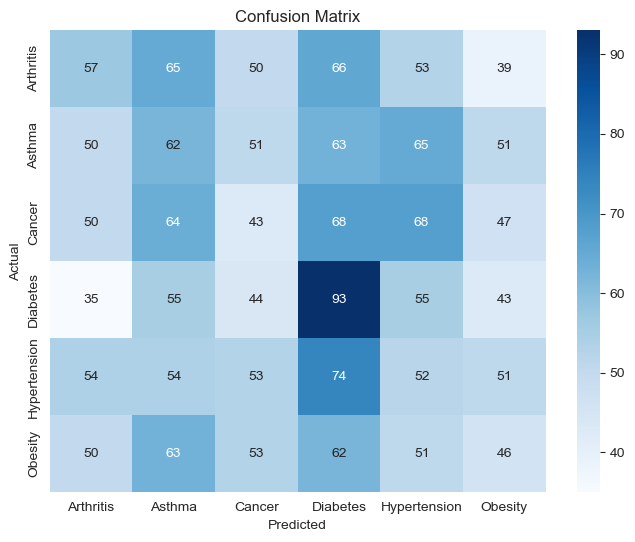

In [28]:
# Step 6: Choose & Train Classification Models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

# Load preprocessed dataset
file_path = "healthcare_dataset.csv"  # Update if needed
df = pd.read_csv(file_path)

# Remove personal data and process the dataset
columns_to_drop = ["Name", "Doctor", "Hospital", "Insurance Provider", "Room Number"]
df_cleaned = df.drop(columns=columns_to_drop, errors="ignore")

df_cleaned["Date of Admission"] = pd.to_datetime(df_cleaned["Date of Admission"], errors="coerce")
df_cleaned["Discharge Date"] = pd.to_datetime(df_cleaned["Discharge Date"], errors="coerce")
df_cleaned["Hospital Stay (Days)"] = (df_cleaned["Discharge Date"] - df_cleaned["Date of Admission"]).dt.days
df_cleaned.drop(columns=["Date of Admission", "Discharge Date"], inplace=True)

df_cleaned["Gender"] = df_cleaned["Gender"].map({"Male": 0, "Female": 1})
df_encoded = pd.get_dummies(df_cleaned, columns=["Blood Type", "Admission Type", "Medication", "Test Results"], drop_first=True)

# Label Encode the target variable
label_encoder = LabelEncoder()
df_encoded["Medical Condition"] = label_encoder.fit_transform(df_encoded["Medical Condition"])

# Split dataset into features and target variable
X = df_encoded.drop(columns=["Medical Condition"])
y = df_encoded["Medical Condition"]

# Normalize numerical features
scaler = StandardScaler()
numeric_features = ["Age", "Billing Amount", "Hospital Stay (Days)"]
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "LightGBM": LGBMClassifier(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500)
}

# Train & Evaluate Models with Cross-Validation
cv_results = {}
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=strat_kfold, scoring="accuracy")
    cv_results[name] = np.mean(scores)
    print(f"{name}: Mean Accuracy = {cv_results[name]:.4f}")

# Select the Best Model
best_model_name = max(cv_results, key=cv_results.get)
best_model = models[best_model_name]

# Train Best Model on Full Training Data
best_model.fit(X_train, y_train)

# Make Predictions
y_pred = best_model.predict(X_test)

# Evaluate Best Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"\nBest Model: {best_model_name}")
print(f"Test Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_rep)

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Test Accuracy: 0.1765
Weighted Precision: 0.1739
Weighted Recall: 0.1765
Weighted F1-score: 0.1740

Classification Report:
               precision    recall  f1-score   support

   Arthritis       0.19      0.17      0.18       330
      Asthma       0.17      0.18      0.18       342
      Cancer       0.15      0.13      0.14       340
    Diabetes       0.22      0.29      0.25       325
Hypertension       0.15      0.15      0.15       338
     Obesity       0.17      0.14      0.15       325

    accuracy                           0.18      2000
   macro avg       0.17      0.18      0.17      2000
weighted avg       0.17      0.18      0.17      2000



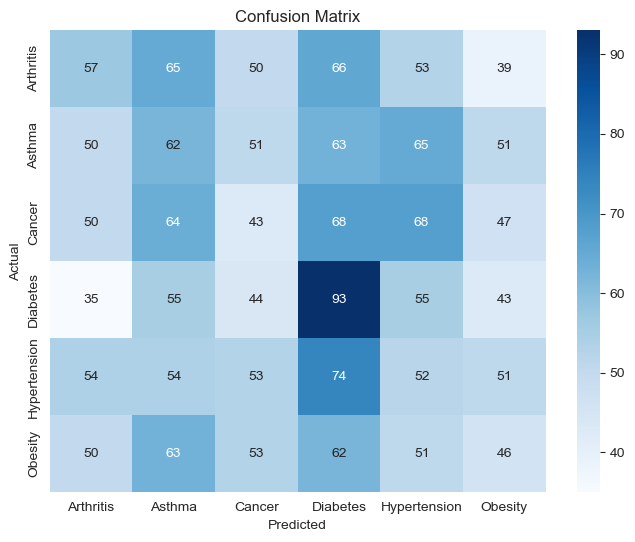

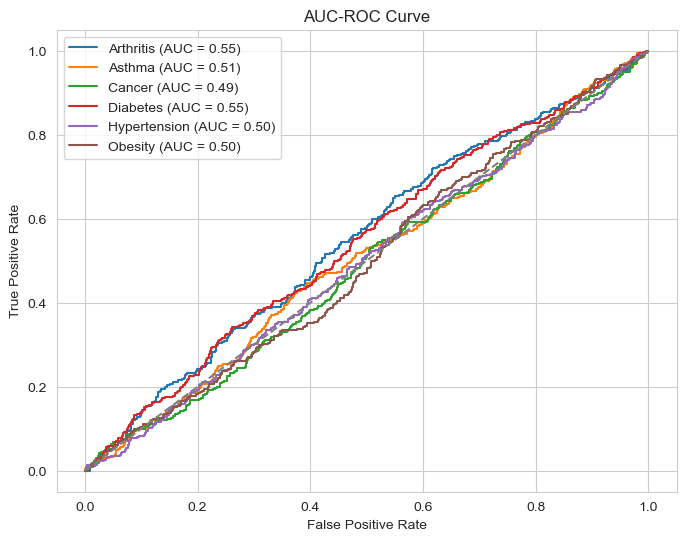

In [29]:
# Step 7: Evaluate Model Performance
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,
    classification_report, confusion_matrix
)
from sklearn.preprocessing import label_binarize

# Get class names
class_names = label_encoder.classes_

# Predictions from the best model (Already trained in Step 6)
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test) if hasattr(best_model, "predict_proba") else None  # Some models don't support probability

# 1. Accuracy, Precision, Recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-score: {f1:.4f}")

# Print Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

# 2. Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 3. AUC-ROC Curve (Only for models that support probability predictions)
if y_pred_proba is not None:
    # Convert target variable to binary for multi-class AUC computation
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    
    plt.figure(figsize=(8, 6))
    
    for i, class_name in enumerate(class_names):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
        auc = roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i])
        plt.plot(fpr, tpr, label=f"{class_name} (AUC = {auc:.2f})")

    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("AUC-ROC Curve")
    plt.legend()
    plt.show()

In [31]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [32]:
# Step 8: Ensure Model Interpretability using SHAP
import shap
import matplotlib.pyplot as plt

# Initialize SHAP Explainer for Tree-based Models (e.g., XGBoost, Random Forest, LightGBM)
if hasattr(best_model, "feature_importances_"):  
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_test)

    # Summary Plot - Shows the impact of each feature
    shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

    # Feature Importance Plot
    shap.summary_plot(shap_values, X_test, plot_type="bar")

# If using models without `feature_importances_`, use Kernel Explainer (slower)
else:
    explainer = shap.KernelExplainer(best_model.predict, X_test[:50])  # Using a small sample for speed
    shap_values = explainer.shap_values(X_test[:50])

    # Waterfall Plot for a single prediction explanation
    shap.initjs()
    shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0, :])

  0%|          | 0/50 [00:00<?, ?it/s]

In [34]:
# Step 9: Optimize & Fine-Tune Model for Best Accuracy
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

# Define hyperparameter grids for different models

param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

param_grid_xgb = {
    "n_estimators": [100, 200],
    "max_depth": [3, 6],
    "learning_rate": [0.01, 0.1]
}

param_grid_lgbm = {
    "n_estimators": [100, 200],
    "num_leaves": [20, 31],
    "learning_rate": [0.01, 0.1]
}

param_grid_mlp = {
    "hidden_layer_sizes": [(50, 50), (100,)],
    "activation": ["relu", "tanh"],
    "learning_rate_init": [0.001, 0.01]
}

# Tune each model separately
models = {
    "Random Forest": (RandomForestClassifier(), param_grid_rf),
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"), param_grid_xgb),
    "LightGBM": (LGBMClassifier(), param_grid_lgbm),
    "Neural Network": (MLPClassifier(max_iter=500), param_grid_mlp)
}

best_models = {}

for name, (model, param_grid) in models.items():
    print(f"\nTuning Hyperparameters for {name}...")
    
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring="accuracy", n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    
    best_models[name] = grid_search.best_estimator_
    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    print(f"Best Accuracy for {name}: {grid_search.best_score_:.4f}")

# Evaluate the best tuned model
final_model = best_models[max(best_models, key=lambda x: best_models[x].score(X_train, y_train))]
y_pred_final = final_model.predict(X_test)

accuracy_final = accuracy_score(y_test, y_pred_final)
print(f"\nFinal Tuned Model: {final_model.__class__.__name__}")
print(f"Final Test Accuracy: {accuracy_final:.4f}")
print("\nFinal Classification Report:\n", classification_report(y_test, y_pred_final, target_names=label_encoder.classes_))


Tuning Hyperparameters for Random Forest...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy for Random Forest: 0.1689

Tuning Hyperparameters for XGBoost...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\PC\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:27:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100}
Best Accuracy for XGBoost: 0.1698

Tuning Hyperparameters for LightGBM...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001356 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 19
[LightGBM] [Info] Start training from score -1.801810
[LightGBM] [Info] Start training from score -1.767555
[LightGBM] [Info] Start training from score -1.769753
[LightGBM] [Info] Start training from score -1.818617
[LightGBM] [Info] Start training from score -1.779337
[LightGBM] [Info] Start training from score -1.814772
Best Parameters for LightGBM: {'learning_rate': 0.01, 'n_estimators': 200, 'num_leave

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Parameters for Neural Network: {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.001}
Best Accuracy for Neural Network: 0.1736

Final Tuned Model: RandomForestClassifier
Final Test Accuracy: 0.1705

Final Classification Report:
               precision    recall  f1-score   support

   Arthritis       0.16      0.16      0.16       330
      Asthma       0.19      0.21      0.20       342
      Cancer       0.16      0.17      0.16       340
    Diabetes       0.21      0.17      0.18       325
Hypertension       0.15      0.17      0.16       338
     Obesity       0.16      0.14      0.15       325

    accuracy                           0.17      2000
   macro avg       0.17      0.17      0.17      2000
weighted avg       0.17      0.17      0.17      2000



In [35]:
pip install streamlit scikit-learn pandas numpy joblib

Note: you may need to restart the kernel to use updated packages.


In [36]:
import joblib

# Save the best model
joblib.dump(final_model, "healthcare_model.pkl")
print("Model saved successfully!")

Model saved successfully!
